<a href="https://colab.research.google.com/github/lmvu103/LSTM-Oil-Price-Prediction/blob/main/LSTM_Oil_Price_Predictions_07Train_03Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import math
import pandas_datareader as web
#Importing necessary libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [17]:
#importing data from yahoo for 2017 to 2020
df = web.DataReader('BZ=F', data_source='yahoo', start='2001-01-01', end='2021-06-26')
df = df.reset_index()

In [18]:
#format date data to appropriate format
df['Date']=pd.to_datetime(df['Date'], format="%b %d, %Y") 
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-07-30,76.529999,75.440002,75.849998,75.739998,2575.0,75.739998
1,2007-07-31,77.169998,75.669998,75.699997,77.050003,3513.0,77.050003
2,2007-08-01,77.059998,74.860001,77.000000,75.349998,3930.0,75.349998
3,2007-08-02,76.209999,74.269997,75.220001,75.760002,6180.0,75.760002
4,2007-08-03,76.000000,74.529999,75.389999,74.750000,4387.0,74.750000


In [ ]:
df.shape

(1112, 6)

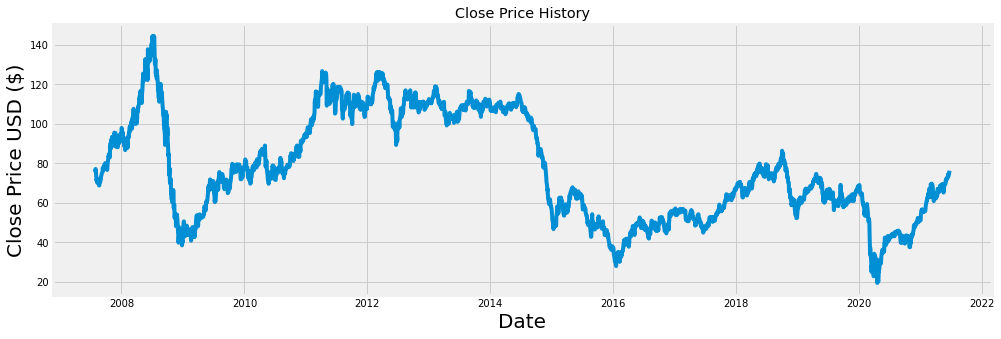

In [3]:
#Plotting the the graph
plt.figure(figsize=(15,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()

In [19]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2732

In [5]:
#sale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.45070306],
       [0.46116971],
       [0.44758706],
       ...,
       [0.44630873],
       [0.4492649 ],
       [0.45421858]])

In [6]:
#create the trainig dataset
#create he scaled training dataset
train_data = scaled_data[0:training_data_len,:]

#spliting the data in x-train and y_train datset
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.45070306, 0.46116971, 0.44758706, 0.45086289, 0.44279321,
       0.4141898 , 0.4192234 , 0.41275164, 0.40651963, 0.40795779,
       0.40667946, 0.40891659, 0.41794501, 0.40300411, 0.4083573 ,
       0.40364331, 0.3943752 , 0.39445506, 0.40372322, 0.40979547,
       0.41243204, 0.40923618, 0.42185998, 0.42002237, 0.42633429,
       0.43616168, 0.43951737, 0.44295297, 0.44534993, 0.44862577,
       0.45581651, 0.46620324, 0.46172899, 0.45453818, 0.46061043,
       0.46548413, 0.47251517, 0.47746879, 0.4791467 , 0.47603069,
       0.46572388, 0.4642058 , 0.4849792 , 0.47810799, 0.46588364,
       0.46380629, 0.46380629, 0.47651006, 0.47595077, 0.4574145 ,
       0.46468517, 0.47355382, 0.48593799, 0.48913391, 0.50671139,
       0.51310323, 0.50974748, 0.52149245, 0.51502076, 0.51086604])]
[0.5075103525396087]

[array([0.45070306, 0.46116971, 0.44758706, 0.45086289, 0.44279321,
       0.4141898 , 0.4192234 , 0.41275164, 0.40651963, 0.40795779,
       0.40667946, 0.40891659, 0.417

In [7]:
#converting x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2672, 60, 1)

In [9]:
#build LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=10,epochs=20)

Epoch 1/20
268/268 [==============================] - 47s 91ms/step - loss: 0.0262
Epoch 2/20
268/268 [==============================] - 25s 92ms/step - loss: 0.0047
Epoch 3/20
268/268 [==============================] - 25s 92ms/step - loss: 0.0042
Epoch 4/20
268/268 [==============================] - 24s 91ms/step - loss: 0.0032
Epoch 5/20
268/268 [==============================] - 25s 92ms/step - loss: 0.0029
Epoch 6/20
268/268 [==============================] - 25s 92ms/step - loss: 0.0024
Epoch 7/20
268/268 [==============================] - 24s 91ms/step - loss: 0.0023
Epoch 8/20
268/268 [==============================] - 25s 92ms/step - loss: 0.0023
Epoch 9/20
268/268 [==============================] - 24s 91ms/step - loss: 0.0020
Epoch 10/20
268/268 [==============================] - 25s 92ms/step - loss: 0.0019
Epoch 11/20
268/268 [==============================] - 24s 91ms/step - loss: 0.0014
Epoch 12/20
268/268 [==============================] - 25s 92ms/step - loss: 0.0016
E

In [10]:
#creating testing dataset
test_data = scaled_data[training_data_len - 60: , :]

#creating x_test and y_tets datasets
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i -60:i, 0])

#converting data to numpy array
x_test = np.array(x_test)

#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [11]:
#RMSE score
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

2.398856960084082

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


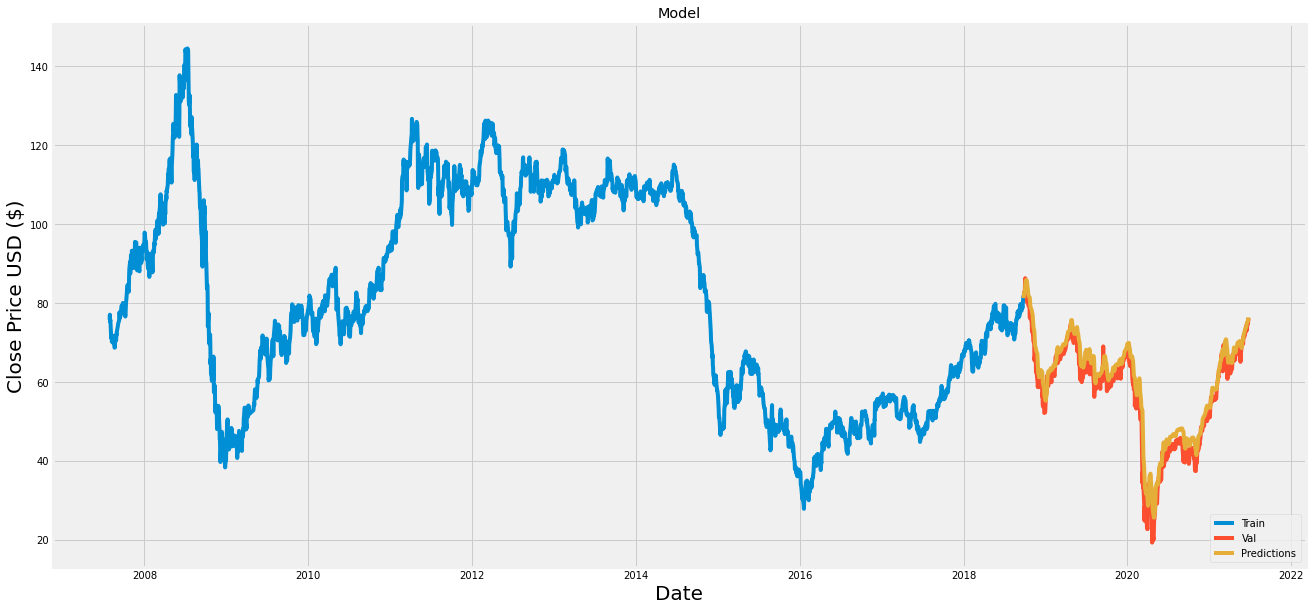

In [12]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualization
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()

In [13]:
#valid and predicted prices
valid

,Close,Predictions
Date,,
2018-09-26,81.339996,81.248253
2018-09-27,81.720001,81.961906
2018-09-28,82.720001,82.530472
2018-10-01,82.669998,83.020912
2018-10-02,84.800003,83.410484
...,...,...
2021-06-21,74.900002,75.213097
2021-06-22,74.809998,75.391525
2021-06-23,75.190002,75.662277


In [14]:
dataset_test = data[-60:].values

inputs = dataset_test
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

i = 0
while i < 30:
    X_test = []
    no_of_sample = len(inputs)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample-30:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = model.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    dataset_test = np.append(dataset_test, predicted_stock_price[0])
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    print('Price next (' + str(i+1) + ') days of Oil Brent : ', predicted_stock_price[0][0])
    i = i + 1

Price next (1) days of Oil Brent :  76.780334
Price next (2) days of Oil Brent :  77.24808
Price next (3) days of Oil Brent :  77.7486
Price next (4) days of Oil Brent :  78.25634
Price next (5) days of Oil Brent :  78.75551
Price next (6) days of Oil Brent :  79.24024
Price next (7) days of Oil Brent :  79.71068
Price next (8) days of Oil Brent :  80.16851
Price next (9) days of Oil Brent :  80.61537
Price next (10) days of Oil Brent :  81.05326
Price next (11) days of Oil Brent :  81.48393
Price next (12) days of Oil Brent :  81.908676
Price next (13) days of Oil Brent :  82.328445
Price next (14) days of Oil Brent :  82.74434
Price next (15) days of Oil Brent :  83.15624
Price next (16) days of Oil Brent :  83.56441
Price next (17) days of Oil Brent :  83.96843
Price next (18) days of Oil Brent :  84.36829
Price next (19) days of Oil Brent :  84.763466
Price next (20) days of Oil Brent :  85.153656
Price next (21) days of Oil Brent :  85.53851
Price next (22) days of Oil Brent :  85

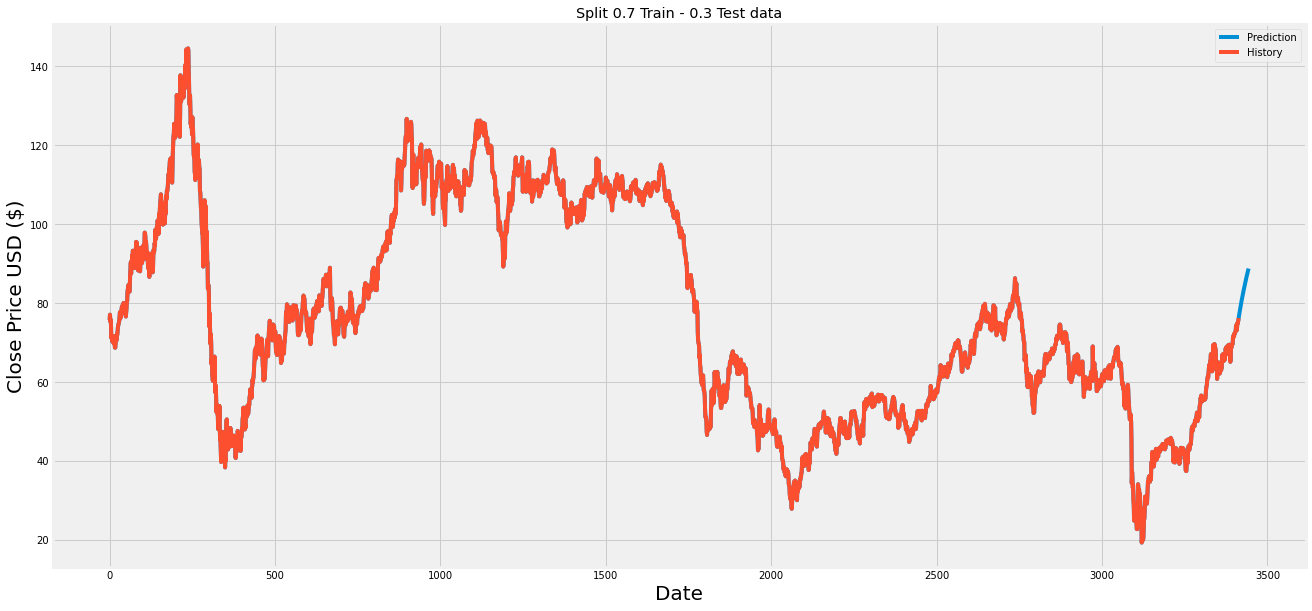

In [24]:
dataset_pre = np.append(data, dataset_test[60:])

#visualization
plt.figure(figsize=(20,10))
plt.title('Split 0.7 Train - 0.3 Test data')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(dataset_pre)
plt.plot(data)
plt.legend(['Prediction', 'History'], loc='upper right')
plt.show()